In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head(29)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
real_x = data.iloc[:,0].values
real_y = data.iloc[:,1].values
real_x = real_x.reshape(-1, 1)
real_y = real_y.reshape(-1, 1)

In [4]:
training_x, testing_x, training_y, testing_y = train_test_split(real_x, real_y, test_size = 0.3, random_state = 0)

In [5]:
Lin = LinearRegression()
Lin.fit(training_x, training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
Pred_y = Lin.predict(testing_x)

In [7]:
#Y = b1x + b0
Lin.coef_

array([[9360.26128619]])

In [8]:
Lin.intercept_

array([26777.3913412])

In [9]:
9360.26128619*1.5 + 26777.3913412

40817.783270485

In [10]:
testing_y[3]

array([63218.])

In [11]:
Pred_y[3]

array([63282.41035735])

Text(0, 0.5, 'Salary')

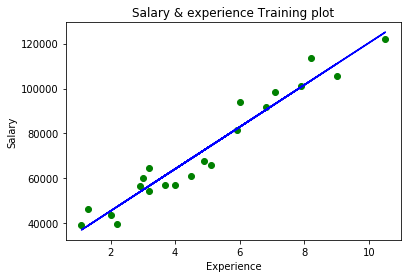

In [12]:
plt.scatter(training_x, training_y, color='green')
plt.plot(training_x, Lin.predict(training_x), color='blue')
plt.title('Salary & experience Training plot')
plt.xlabel("Experience")
plt.ylabel("Salary")

Text(0.5, 0, 'Salary')

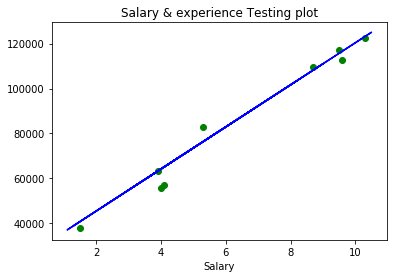

In [13]:
plt.scatter(testing_x, testing_y, color='green')
plt.plot(training_x, Lin.predict(training_x), color='blue')
plt.title('Salary & experience Testing plot')
plt.xlabel("Experience")
plt.xlabel("Salary")

                Multiple Linear Regression
                           _||_  
                           \  /
                            \/

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
data = pd.read_csv("Startups.csv")
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
real_x = data.iloc[:,0:4].values
real_y = data.iloc[:,4].values
real_x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [60]:
le = LabelEncoder()
real_x[:,3] = le.fit_transform(real_x[:,3])
oneHE = OneHotEncoder(categorical_features=[3])
real_x = oneHE.fit_transform(real_x).toarray()

C:\Users\dhruv\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\dhruv\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.3689780e+05, 2.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.5137759e+05, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0114555e+05, 1.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.3542692e+05, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        5.1743150e+04, 2.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.1698380e+05, 0.0000000e+00]])

In [58]:
training_x, test_x, training_y, test_y = train_test_split(real_x, real_y, test_size=0.2,random_state=0)
training_x

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0305749e+05, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        8.5047440e+04, 2.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.4413598e+05, 1.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.3689780e+05, 2.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.3542692e+05, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.5480614e+05, 0.0000000e+00]])

In [39]:
MLR = LinearRegression()
MLR.fit(training_x, training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
pred_y = MLR.predict(test_x)
pred_y

array([199600.75882086,  60143.89297701,  90688.92069128,  51564.07120665,
        76406.62606324, 125264.24294482,  31672.05437792, 162808.0206343 ,
       109113.07713365,  61662.96568567])

In [44]:
test_y

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [41]:
MLR.coef_

array([ 2.45459074e+04, -2.45459074e+04, -8.35441226e+04,  2.54730776e+04,
       -5.47279028e+04, -5.47763014e+04,  7.17349394e-07, -9.01968466e+04,
        4.70510761e+03, -9.30789611e-07, -2.48645820e+04, -2.23470851e+04,
        3.41766873e+04,  9.10357013e+04,  3.59369368e+04, -6.30494994e+04,
        1.74822355e+04, -7.27595761e-12,  1.61944655e+03, -1.92931405e+04,
       -2.49366720e+04, -6.23024151e+04,  0.00000000e+00,  2.53657928e+04,
        7.27595761e-12,  7.27595761e-12, -3.56567436e+04,  2.49593598e+04,
        2.64937276e+04,  2.17933355e+04, -5.31146783e+04, -4.12588543e+04,
        2.81639682e+04,  8.10048295e+03,  2.56134328e+04, -2.59128183e+04,
        7.27595761e-12,  0.00000000e+00,  1.25851529e+04, -2.75485710e+04,
       -4.57565585e+03,  6.40875855e+04,  1.22550470e+04,  7.41265739e+04,
        1.22243630e+04,  0.00000000e+00,  7.15332877e+04,  0.00000000e+00,
        4.15774256e+04,  5.33430685e+04, -7.07317659e+02, -2.11588130e+03,
        2.82319896e+03,  

In [42]:
MLR.intercept_

-102443.93861208035